In [16]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import math
import pandas as pd
import statistics as st

In [17]:
def clap_pos(clap_array, samplingFreq, timeArray, pingValues): #PING INPUT HERE
    max_clap_sec = 15                                #Maximum number of claps allowed in a second
    N = math.ceil(samplingFreq/(8000*max_clap_sec))
    cumsum, moving_aves = [0], []
    #ping_error, average_ping = 0
    
    result = {
        "clap_array" : clap_array,
        "clap_index" : [],
        "time_array" : timeArray,
        "pingValues" : pingValues,
        "num_of_claps": []
    }
    
    for i, x in enumerate(abs(clap_array), 1):
        cumsum.append(cumsum[i - 1] + x)
        if i >= N:
            moving_ave = (cumsum[i] - cumsum[i - N])/N
            moving_aves.append(moving_ave)
    
    
    moving_aves = np.array(moving_aves)
    thresh = moving_aves.mean()
    indices = find_peaks(moving_aves, threshold=thresh)[0]
    
    pos_indices = []
    min_height_indices = []
    corrected_indices = []
    
    for i in range(indices.__len__()):
        if moving_aves[indices[i]]>0:
            pos_indices.append(indices[i])
    
    if pos_indices.__len__() > 0:
       min_height = 0.8 * min(moving_aves[pos_indices])
    else:
        return result
    
    for i in range(pos_indices.__len__()):
        if moving_aves[pos_indices[i]] > min_height:
            min_height_indices.append(pos_indices[i])
            
    print(min_height_indices)
    
    time_len = timeArray.__len__()
    if time_len > 0:
        time_index_ratio = (timeArray[time_len - 1] - timeArray[0])/time_len
    else:
        return result
    
    min_gap = math.ceil(1/(max_clap_sec*time_index_ratio))
    
    j = 0
    for i in range(min_height_indices.__len__()):
        temp = min_height_indices[i]
        if i == 0:
            corrected_indices.append(temp)
        elif temp - corrected_indices[j] > min_gap:
            corrected_indices.append(temp)
            j += 1
        
    for i in range(corrected_indices.__len__()):
        corrected_indices[i]=corrected_indices[i]-pingValues;
    
    
    num_of_claps = corrected_indices.__len__()
    result["clap_array"] = clap_array
    result["clap_index"] = corrected_indices
    result["time_array"] = timeArray
    result["num_of_claps"] = num_of_claps
    result["pingValues"] = pingValues
    

            
    return result

In [18]:
def clap_stats(clap_index, timeArray):
    clap_time_diff = []
    
    num_of_claps = clap_index.__len__()
    
    for i in range(0, num_of_claps - 1):
        clap_time_diff.append(timeArray[clap_index[i + 1]] - timeArray[clap_index[i]])
    
    arr = [timeArray[i] for i in clap_index]
        
    stats = {
        "mean" : np.array(clap_time_diff).mean(),
        "std" : np.array(clap_time_diff).std(),
        "diff": clap_time_diff,
        "clap_times": arr
    }
    
    return stats

In [19]:
def split_arrays(subject_clap_array, subject_time_array) :
    if((np.size(subject_clap_array)-np.size(subject_clap_array)%10) > 0):
        subject_clap_array_modified = np.delete(subject_clap_array, np.s_[(np.size(subject_clap_array)-np.size(subject_clap_array)%10):])
        split_clap_arrays = np.split(subject_clap_array_modified, 10)
    
    else :
        split_clap_arrays = np.split(subject_clap_array, 10)
        
    if((np.size(subject_time_array)-np.size(subject_time_array)%10) > 0):
        subject_time_array_modified = np.delete(subject_time_array, np.s_[(np.size(subject_time_array)-np.size(subject_time_array)%10):])
        split_time_arrays = np.split(subject_time_array_modified, 10)
    
    else :
        split_time_arrays = np.split(subject_time_array, 10)
        
    result = {
        "split_clap_arrays" : split_clap_arrays,
        "split_time_arrays" : split_time_arrays
    }
    
    return result

# Import Pairs

## Set 1: Cliche KK

### 1. Cliche

array([0.00000000e+00, 2.08333409e-05, 4.16666818e-05, ...,
       5.73882708e+01, 5.73882917e+01, 5.73883125e+01])

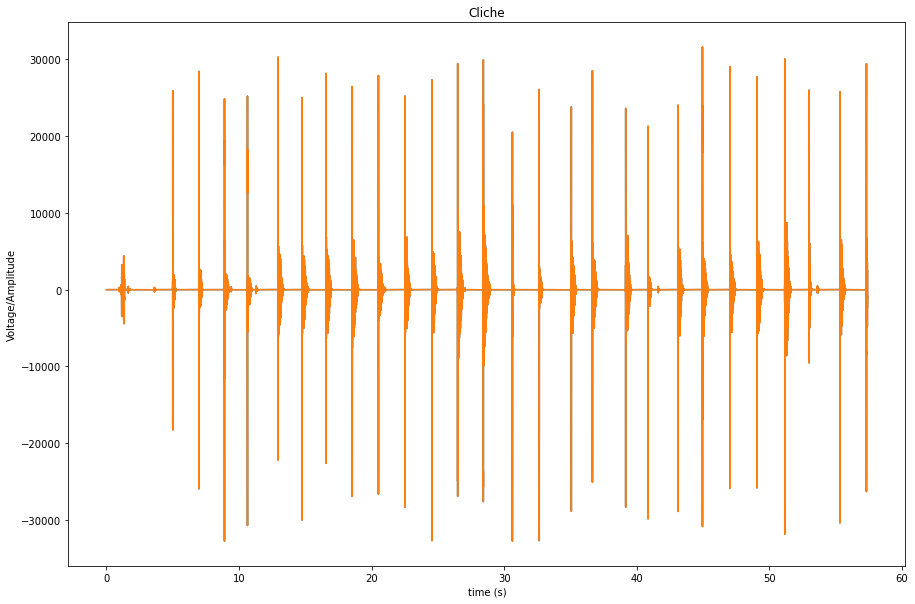

In [20]:
cliche1_sampleRate, cliche1_data = read("./Pairs/ClicheKK/306178101-1_clicheduh_1904.wav")
cliche1_length = cliche1_data.shape[0] / cliche1_sampleRate
cliche1_ping_values = 75
cliche1_time = np.linspace(0., cliche1_length, cliche1_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(cliche1_time, cliche1_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Cliche")
#plt.margins(x=-0.2, y=0) 

cliche1_clap_array = []           #this array stores the intensities for cliche
for i in range(0, cliche1_data.shape[0]):
    cliche1_clap_array.append(cliche1_data[i][0])
    
cliche1_time

### 2. KK

array([0.00000000e+00, 2.08333409e-05, 4.16666818e-05, ...,
       5.73577292e+01, 5.73577500e+01, 5.73577708e+01])

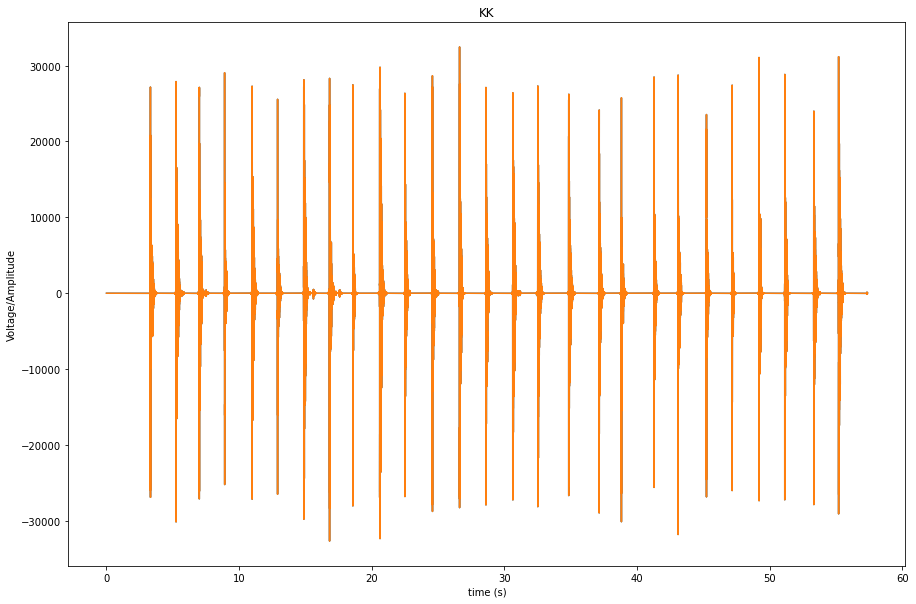

In [21]:
kk1_sampleRate, kk1_data = read("./Pairs/ClicheKK/306178101-2_madd_scientist_3257.wav")
kk1_length = kk1_data.shape[0] / kk1_sampleRate
kk1_ping_values = 51
kk1_time = np.linspace(0., kk1_length, kk1_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(kk1_time, kk1_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("KK")
#plt.margins(x=-0.2, y=0) 

kk1_clap_array = []           #this array stores the intensities for KK
for i in range(0, kk1_data.shape[0]):
    kk1_clap_array.append(kk1_data[i][0])
    
kk1_time

## Set 2: Cliche Mulay

### 1. Cliche

array([0.00000000e+00, 2.08333410e-05, 4.16666821e-05, ...,
       5.63764167e+01, 5.63764375e+01, 5.63764583e+01])

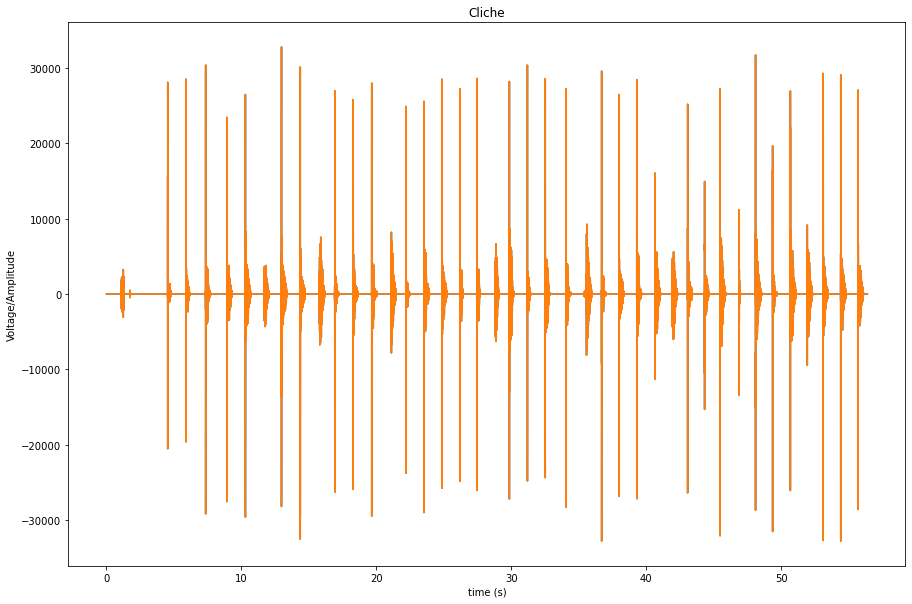

In [22]:
cliche2_sampleRate, cliche2_data = read("./Pairs/ClicheMulay/462400988-1_clicheduh_1904.wav")
cliche2_length = cliche2_data.shape[0] / cliche2_sampleRate
cliche2_ping_values = 55
cliche2_time = np.linspace(0., cliche2_length, cliche2_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(cliche2_time, cliche2_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Cliche")
#plt.margins(x=-0.2, y=0) 

cliche2_clap_array = []           #this array stores the intensities for cliche
for i in range(0, cliche2_data.shape[0]):
    cliche2_clap_array.append(cliche2_data[i][0])
    
cliche2_time

### 2. Mulay

array([0.00000000e+00, 2.08333410e-05, 4.16666820e-05, ...,
       5.67403958e+01, 5.67404167e+01, 5.67404375e+01])

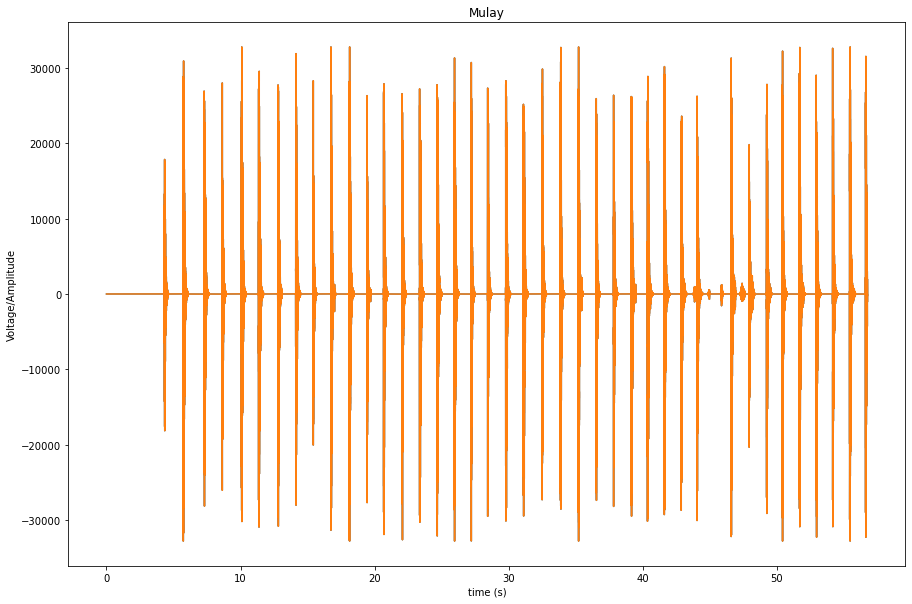

In [23]:
mulay2_sampleRate, mulay2_data = read("./Pairs/ClicheMulay/462400988-2_Applecider_3388.wav")
mulay2_length = mulay2_data.shape[0] / mulay2_sampleRate
mulay2_ping_values = 15
mulay2_time = np.linspace(0., mulay2_length, mulay2_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(mulay2_time, mulay2_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Mulay")
#plt.margins(x=-0.2, y=0) 

mulay2_clap_array = []           #this array stores the intensities for the median
for i in range(0, mulay2_data.shape[0]):
    mulay2_clap_array.append(mulay2_data[i][0])
    
mulay2_time

## Set 3: Mulay KK

### 1. Mulay

array([0.00000000e+00, 2.08333409e-05, 4.16666818e-05, ...,
       5.73982917e+01, 5.73983125e+01, 5.73983333e+01])

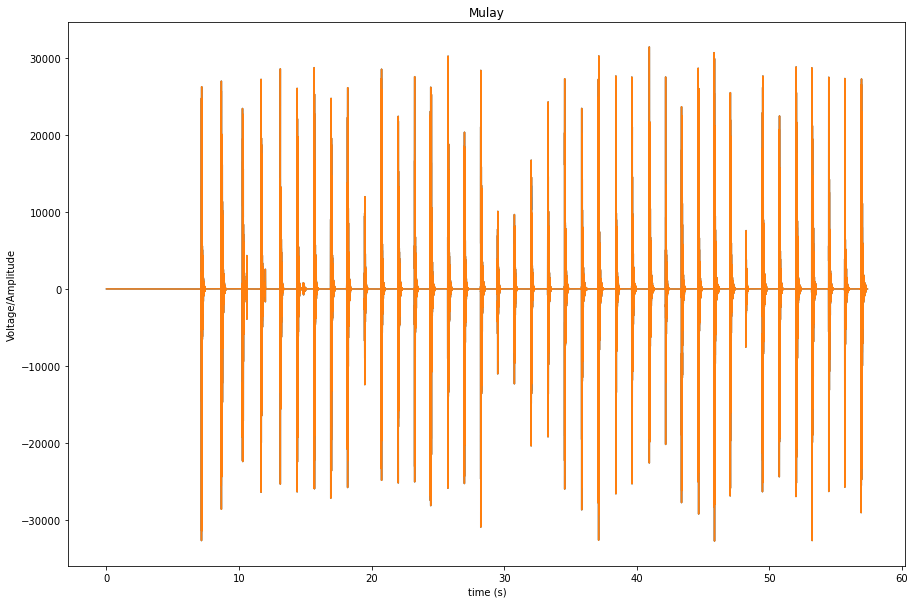

In [24]:
mulay3_sampleRate, mulay3_data = read("./Pairs/MulayKK/551310681-2_Applecider_3388.wav")
mulay3_length = mulay3_data.shape[0] / mulay3_sampleRate
mulay3_ping_values = 18
mulay3_time = np.linspace(0., mulay3_length, mulay3_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(mulay3_time, mulay3_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Mulay")
#plt.margins(x=-0.2, y=0) 

mulay3_clap_array = []           #this array stores the intensities for the median
for i in range(0, mulay3_data.shape[0]):
    mulay3_clap_array.append(mulay3_data[i][0])
    
mulay3_time

### 2. KK

array([0.00000000e+00, 2.08333409e-05, 4.16666818e-05, ...,
       5.73577292e+01, 5.73577500e+01, 5.73577708e+01])

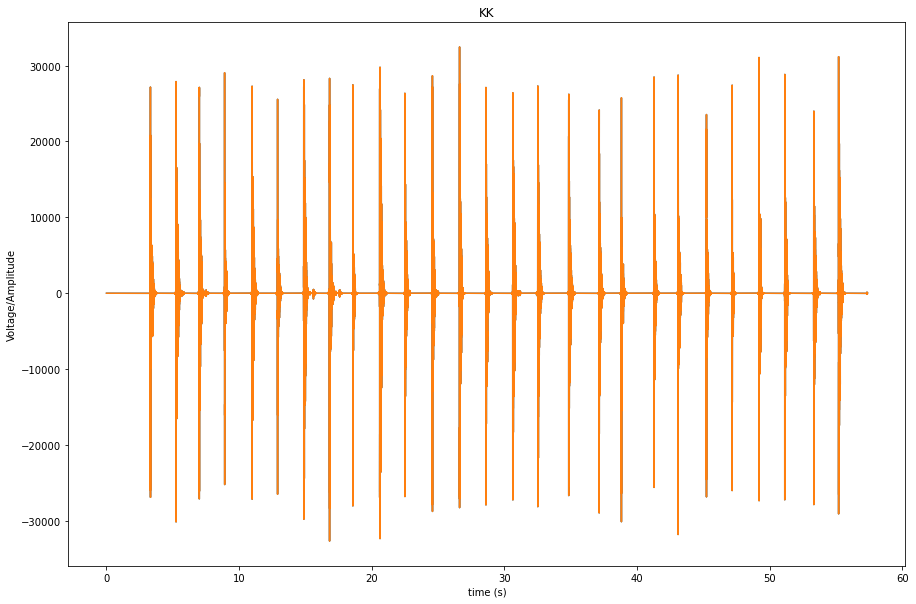

In [25]:
kk3_sampleRate, kk3_data = read("./Pairs/ClicheKK/306178101-2_madd_scientist_3257.wav")
kk3_length = kk3_data.shape[0] / kk3_sampleRate
kk3_ping_values = 52
kk3_time = np.linspace(0., kk3_length, kk3_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(kk3_time, kk3_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("KK")
#plt.margins(x=-0.2, y=0) 

kk3_clap_array = []           #this array stores the intensities for KK
for i in range(0, kk3_data.shape[0]):
    kk3_clap_array.append(kk3_data[i][0])
    
kk3_time

# Graph Set 1: Cliche KK

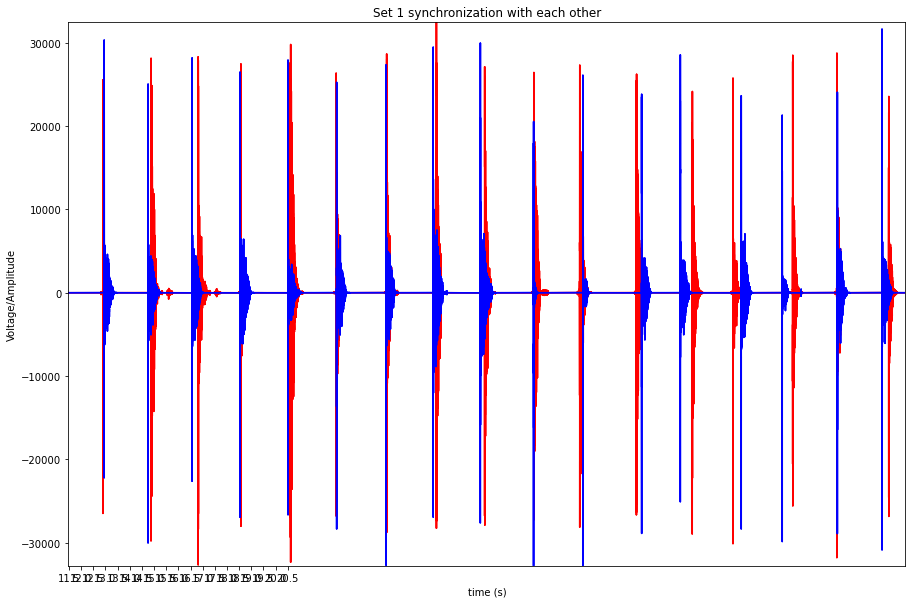

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(kk1_time, kk1_data, color='r')
plt.plot(cliche1_time, cliche1_data, color='b')
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.xticks(np.arange(0, 21, 0.5))
plt.title('Set 1 synchronization with each other')
plt.margins(x=-0.2, y=0)
plt.show()

# Graph Set 2: Cliche Mulay

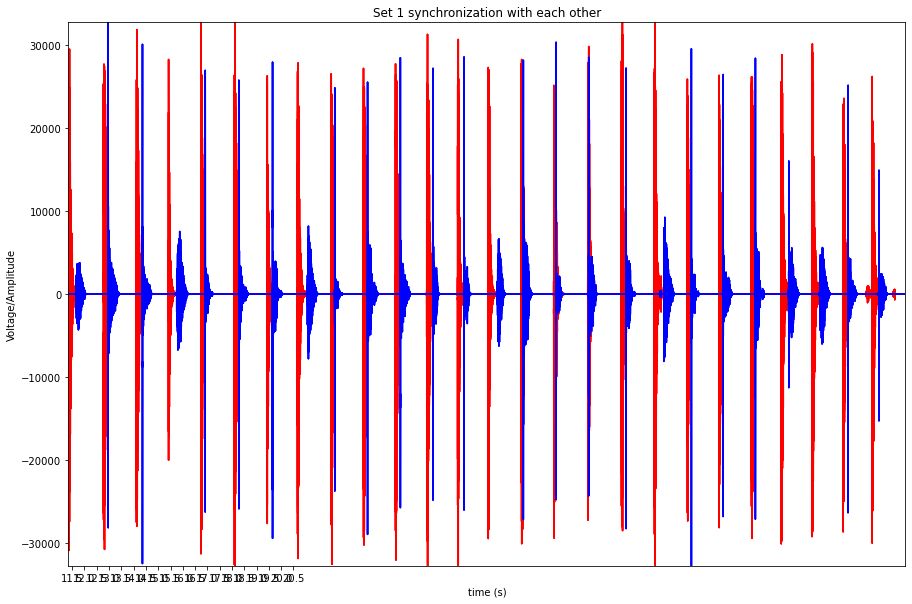

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(mulay2_time, mulay2_data, color='r')
plt.plot(cliche2_time, cliche2_data, color='b')
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.xticks(np.arange(0, 21, 0.5))
plt.title('Set 1 synchronization with each other')
plt.margins(x=-0.2, y=0)
plt.show()

# Graph Set 3: Mulay KK

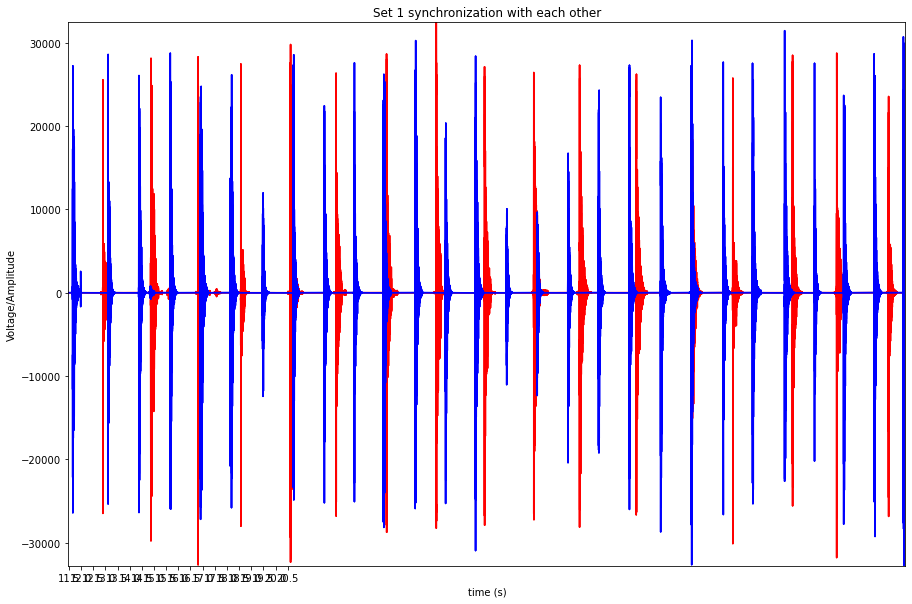

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(kk3_time, kk3_data, color='r')
plt.plot(mulay3_time, mulay3_data, color='b')
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.xticks(np.arange(0, 21, 0.5))
plt.title('Set 1 synchronization with each other')
plt.margins(x=-0.2, y=0)
plt.show()